## DataCo Supply Chain Analysis

* [Introduction](#chapter0)
* [Shipping Modes Performance](#chapter1)
* [Engaging with Potential Clients](#chapter4)
* [Supply Chain Performance by Shipping Modes](#chapter11)
* [Shipping Days and Delivery Date Variance](#chapter2)
* [Delivery Date Variance in terms of Product Categories and Days of the week](#chapter3)
* [Summary](#chapter5)




## Introduction <a class="anchor"  id="chapter0"></a>

This is a brief supply chain analysis on the company DataCo Global.
Shipping Modes (Days for shipment scheduled):
1. Standard Class (4 Days)
2. Second Class (2 Days)
3. First Class (1 Day)
4. Same Day (0 Day)

It is presumable that the cost will be greater for a delivery method with a quicker shipping timetable.

In this study, the effectiveness of the shipping modes is examined. Customers have been discovered to favor the least expensive shipping method. In the supply chain, several delivery methods also have major issues, which cause many delays and longer delay times. The exact core cause and solutions for the problem cannot be determined due to the dataset's deficiency. 



In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
supply = pd.read_csv('DataCoSupplyChainDataset.csv', encoding='ISO-8859-1')

In [18]:
supply.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [17]:
print(supply.columns)

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Customer Zipcode',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Order Zipcode', 'Product Card Id', 'Product Category Id',
       'Product De

In [21]:
# Convert column names to lowercase with underscores
supply.columns = supply.columns.str.lower().str.replace(' ', '_').str.replace("(", "").str.replace(")", "")

# Drop unnecessary columns
columns_to_drop = ["customer_email", "customer_fname", "customer_lname", "customer_password", "latitude", "longitude", "product_description", "product_image"]
supply.drop(columns=columns_to_drop, inplace=True)

# Convert "shipping_date_dateorders" to datetime
supply["shipping_date_dateorders"] = pd.to_datetime(supply["shipping_date_dateorders"])

# Extract year, day name, and hour from "shipping_date_dateorders"
supply["shipping_year"] = supply["shipping_date_dateorders"].dt.year
supply["shipping_day"] = supply["shipping_date_dateorders"].dt.day_name()
supply["shipping_hour"] = supply["shipping_date_dateorders"].dt.hour

# Calculate "late_days" by subtracting "days_for_shipment_scheduled" from "days_for_shipping_real"
supply["late_days"] = supply["days_for_shipping_real"] - supply["days_for_shipment_scheduled"]

In [13]:
supply.head()

,type,days_for_shipping_real,days_for_shipment_scheduled,benefit_per_order,sales_per_customer,delivery_status,late_delivery_risk,category_id,category_name,customer_city,...,product_category_id,product_name,product_price,product_status,shipping_date_dateorders,shipping_mode,shipping_year,shipping_day,shipping_hour,late_days
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,73,Smart watch,327.75,0,2018-02-03 22:56:00,Standard Class,2018,Saturday,22,-1
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,73,Smart watch,327.75,0,2018-01-18 12:27:00,Standard Class,2018,Thursday,12,1
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,73,Smart watch,327.75,0,2018-01-17 12:06:00,Standard Class,2018,Wednesday,12,0
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,73,Smart watch,327.75,0,2018-01-16 11:45:00,Standard Class,2018,Tuesday,11,-1
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,73,Smart watch,327.75,0,2018-01-15 11:24:00,Standard Class,2018,Monday,11,-2


In [22]:
supply['shipping_mode']

0         Standard Class
1         Standard Class
2         Standard Class
3         Standard Class
4         Standard Class
               ...      
180514    Standard Class
180515      Second Class
180516    Standard Class
180517    Standard Class
180518    Standard Class
Name: shipping_mode, Length: 180519, dtype: object

In [28]:
# Calculate total count of each shipping_mode
total = supply['shipping_mode'].value_counts().reset_index()
total.columns = ['shipping_mode', 'total_number']

# Calculate metrics for each shipping_mode and delivery_status combination
ship_mode = supply.groupby(["shipping_mode", "delivery_status"], as_index=False).agg(
    number=("delivery_status", "count"),
    late_delivery_risk=("late_delivery_risk", "mean"),
    actual_days_for_shipping=("days_for_shipping_real", "mean"),
    scheduled_days_for_shipping=("days_for_shipment_scheduled", "mean"),
    total_item=("order_item_quantity", "mean"),
    late_days=("late_days", "mean")
)

# # Merge total count into the ship_mode dataframe
ship_mode = ship_mode.merge(total, on="shipping_mode")

# # Calculate the percentage for each delivery_status within each shipping_mode
ship_mode["percentage"] = ship_mode["number"] / ship_mode["total_number"] * 100

# # Create separate dataframes for each shipping_mode
first_class = ship_mode[ship_mode["shipping_mode"] == "First Class"].pivot(
    index="shipping_mode", columns="delivery_status", values="percentage"
)
second_class = ship_mode[ship_mode["shipping_mode"] == "Second Class"].pivot(
    index="shipping_mode", columns="delivery_status", values="percentage"
)
standard_class = ship_mode[ship_mode["shipping_mode"] == "Standard Class"].pivot(
    index="shipping_mode", columns="delivery_status", values="percentage"
)
same_day = ship_mode[ship_mode["shipping_mode"] == "Same Day"].pivot(
    index="shipping_mode", columns="delivery_status", values="percentage"
)

# Concatenate the dataframes into ship_mode_graph
ship_mode_graph = pd.concat([first_class, second_class, standard_class, same_day])


In [27]:
ship_mode


,shipping_mode,delivery_status,number,late_delivery_risk,actual_days_for_shipping,scheduled_days_for_shipping,total_item,late_days,total_number,percentage
0,First Class,Late delivery,26513,1.0,2.000000,1.0,2.132312,1.000000,27814,95.322499
1,First Class,Shipping canceled,1301,0.0,2.000000,1.0,2.115296,1.000000,27814,4.677501
2,Same Day,Late delivery,4454,1.0,1.000000,0.0,2.133139,1.000000,9737,45.743042
3,Same Day,Shipping canceled,444,0.0,0.457207,0.0,2.166667,0.457207,9737,4.559926
4,Same Day,Shipping on time,4839,0.0,0.000000,0.0,2.163464,0.000000,9737,49.697032
5,Second Class,Late delivery,26987,1.0,4.496795,2.0,2.129099,2.496795,35216,76.632781
6,Second Class,Shipping canceled,1410,0.0,3.934752,2.0,2.136170,1.934752,35216,4.003862
7,Second Class,Shipping on time,6819,0.0,2.000000,2.0,2.110573,0.000000,35216,19.363358
8,Standard Class,Advance shipping,41592,0.0,2.498149,4.0,2.133511,-1.501851,107752,38.599748
9,Standard Class,Late delivery,41023,1.0,5.506838,4.0,2.122614,1.506838,107752,38.071683


In [9]:
total

,shipping_mode,total_number
0,Standard Class,107752
1,Second Class,35216
2,First Class,27814
3,Same Day,9737


In [29]:
ship_mode_graph

delivery_status,Late delivery,Shipping canceled,Shipping on time,Advance shipping
shipping_mode,,,,
First Class,95.322499,4.677501,NaN,NaN
Second Class,76.632781,4.003862,19.363358,NaN
Standard Class,38.071683,4.268134,19.060435,38.599748
Same Day,45.743042,4.559926,49.697032,NaN


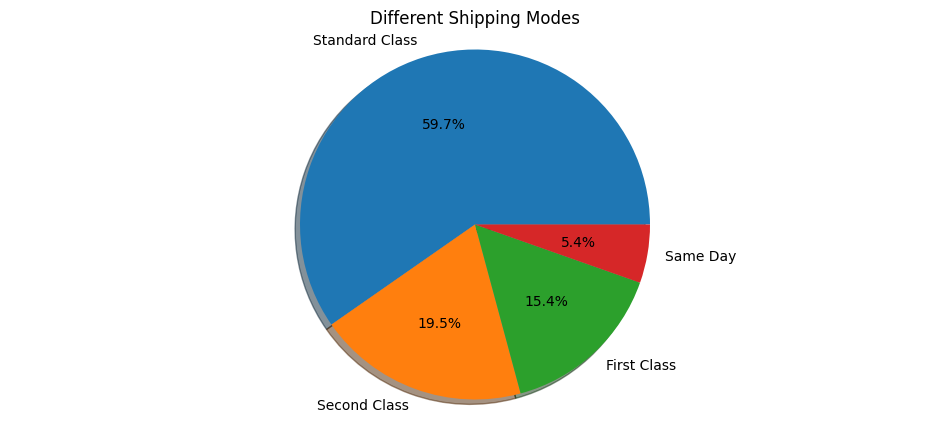

In [31]:
fig, (ax1) = plt.subplots(1, 1, figsize=(12, 5))
x = total["shipping_mode"]
y = total["total_number"]
ax1.pie(y,labels=x,  autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
ax1.set_title('Different Shipping Modes')
plt.show()

## Shipping Modes Performance <a class="anchor"  id="chapter1"></a>

In this Pie Chart, it is clear that Standard Class is the majority of shipping mode among the others, while Same Day shipping mode only shares a small portion. Also, it is shown that customers tend to use the shipping method with a lower price. 

Summary:

* Customers tend to use the shipping method with a lower price


C:\Users\ahmed\AppData\Local\Temp\ipykernel_9992\1291482230.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
C:\Users\ahmed\AppData\Local\Temp\ipykernel_9992\1291482230.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)


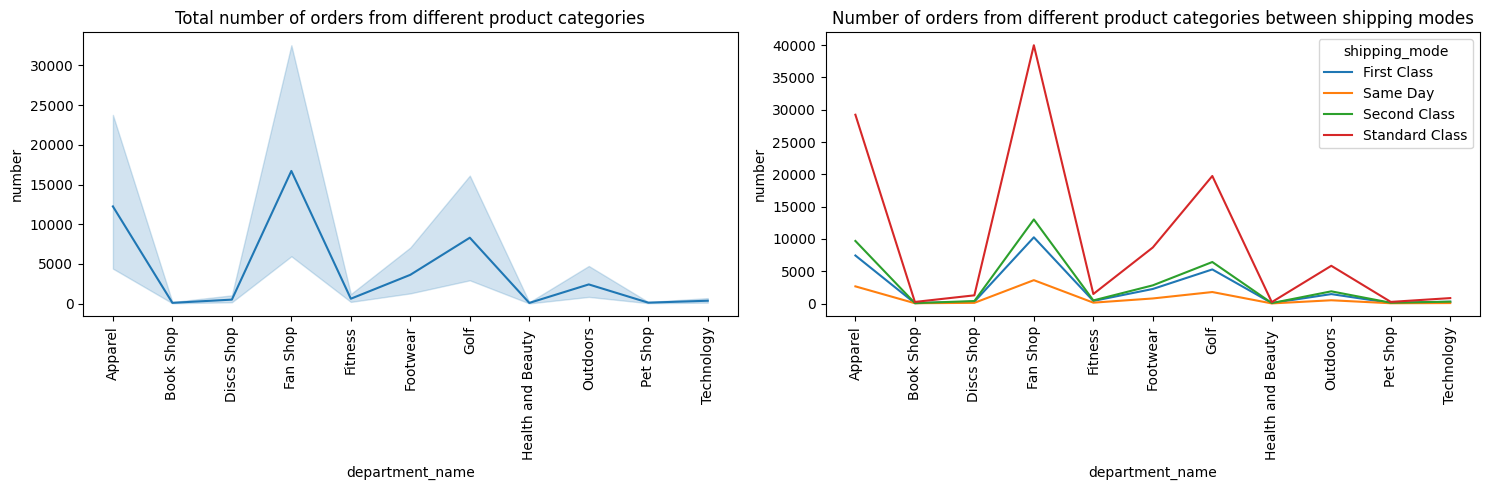

In [32]:
# Group by department_name and calculate metrics for each shipping_mode
department = supply.groupby(["department_name", "shipping_mode"], as_index=False).agg(
    number=("delivery_status", "count"),
    late_delivery_risk=("late_delivery_risk", "mean"),
    actual_days_for_shipping=("days_for_shipping_real", "mean"),
    scheduled_days_for_shipping=("days_for_shipment_scheduled", "mean"),
    total_item=("order_item_quantity", "mean"),
    late_days=("late_days", "mean")
)

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Line plot for total number of orders by department_name
sns.lineplot(x="department_name", y="number", data=department, ax=ax1)
ax1.set_title("Total number of orders from different product categories")
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)

# Line plots for number of orders by department_name and shipping_mode
sns.lineplot(x="department_name", y="number", hue="shipping_mode", data=department, ax=ax2)
ax2.set_title("Number of orders from different product categories between shipping modes")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

## Engaging with Potential Clients <a class="anchor"  id="chapter4"></a>

The left-hand side graph shows the total number of orders placed in different product categories.

* **Fan Shop, Apparel, and Golf** products have the **largest number of order** when using our service.

The right-hand side graph shows the number of orders for different shipping modes. It shares simialr pattern with the left-hand side graph.

* **Most orders** perfer using **Standard Class** service
* **Fan Shop, Apparel, and Golf** products have the **largest number of order** in terms of **all shipping modes**.

Advice:
* **Sales Team** can **approach potential clients** from **Fan Shop, Apparel, and Golf industry**.
* Their customers also have **higher chance** to use **premier shipping modes**.

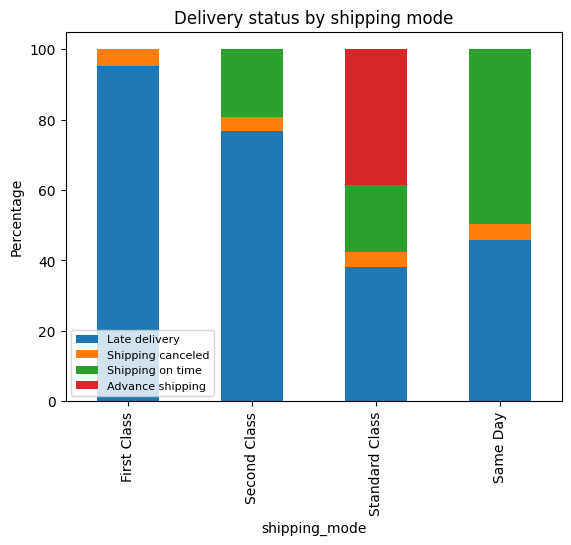

In [33]:
ship_mode_graph.plot(kind='bar', stacked=True)
plt.xlabel('shipping_mode')
plt.ylabel('Percentage')
plt.title('Delivery status by shipping mode')
plt.legend(loc='lower left', prop={'size': 8})

## Supply Chain Performance by Shipping Modes <a class="anchor"  id="chapter11"></a>
As the stacked barchart shown, the **performance of all shipping modes is not so good**. In general, **40% of the orders** are **late** delivery. Almost **95% orders of First Class** shipping mode are **late** delivery. As a result, First Class and Second Class shipping modes require improvements in terms of supply chain to deliver orders on time.

Summary:

* First Class and Second Class shipping modes have serious late delivery problem

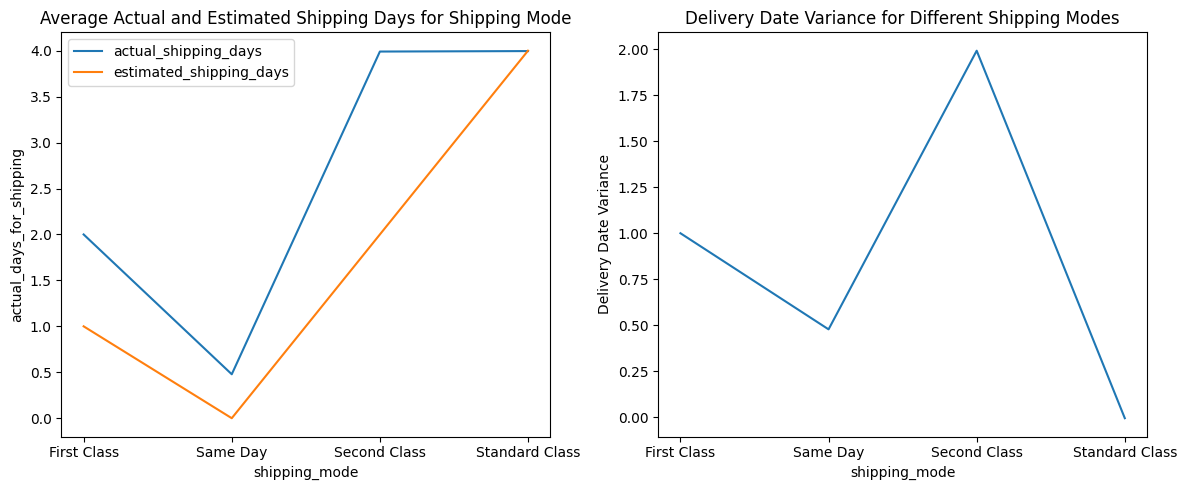

In [35]:

# Calculate metrics for each shipping_mode
shipping_mode = supply.groupby("shipping_mode", as_index=False).agg(
    number=("delivery_status", "count"),
    late_delivery_risk=("late_delivery_risk", "mean"),
    actual_days_for_shipping=("days_for_shipping_real", "mean"),
    scheduled_days_for_shipping=("days_for_shipment_scheduled", "mean"),
    total_item=("order_item_quantity", "mean"),
    late_days=("late_days", "mean")
)

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Line plot for average actual and estimated shipping days
sns.lineplot(x="shipping_mode", y="actual_days_for_shipping", data=shipping_mode, label='actual_shipping_days', ax=ax1)
sns.lineplot(x="shipping_mode", y="scheduled_days_for_shipping", data=shipping_mode, label='estimated_shipping_days', ax=ax1)
ax1.set_title("Average Actual and Estimated Shipping Days for Shipping Mode")
ax1.legend(loc='upper left')

# Line plot for delivery date variance for different shipping modes
sns.lineplot(x="shipping_mode", y="late_days", data=shipping_mode, ax=ax2)
ax2.set_title("Delivery Date Variance for Different Shipping Modes")
ax2.set_ylabel("Delivery Date Variance")

plt.tight_layout()
plt.show()

## Shipping Days and Delivery Date Variance <a class="anchor"  id="chapter2"></a>
From the line graph on left-hand side, it is clear that the actual shipping days are larger than the estimated one for First Class, Same Day, and Second Class shipping mode. Only Standard Class can complete the delivery as estimated.

* First Class, Second Class, Same Day takes longer time to be completed as expected.
* Standard Class normally deliver on time.

From the line graph on right-hand side, it is more clear about the delivery date variance. 

**Delivery Date Variance = Actual Shipping Days - Estimated Shipping Days.**

As a result, if the value is greater than 0, it means that delivery takes longer days to be completed than estimated. If it is less than 0, it means the delivery is completed earlier than expected.

In this line graph, the shadows are showing the maximum and minimum delivery date variance, while the line is showing the average value.

* **First Class** is very stable, which is always **one day behind** the schedule. 

* The performance of **Same Day** shipping mode is **not bad** as it has an average 0.5 days longer than expected. 

* **Second Class** has the **most poor performance** as it usually takes 1.5 days longer to complete the delivery, which is the longest among others. Besides, it has the largest maximum delivery date variance, which indicates that it has **the longest delay**. 

* **Standard Class** has the **best performance** as it usually delivers on time. Besides, it sometimes **delivers earlier than expected**.


Text(0, 0.5, 'Delivery Date Variance')

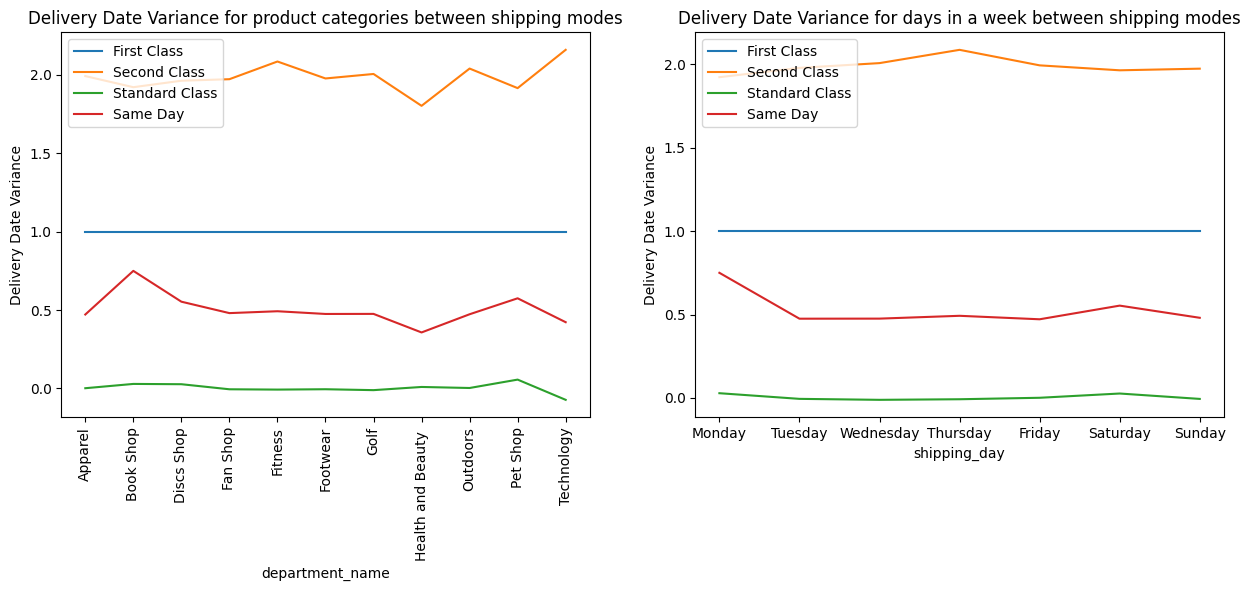

In [37]:
first_class_department = supply[supply["shipping_mode"] == "First Class"]
first_class_department = first_class_department.groupby(["department_name"], as_index = False).agg(number = ("delivery_status", "count"),  late_delivery_risk = ("late_delivery_risk", "mean"), actual_days_for_shipping = ("days_for_shipping_real", "mean"), scheduled_days_for_shipping = ("days_for_shipment_scheduled", "mean"), total_item = ("order_item_quantity", "mean"), late_days = ("late_days", "mean"))
second_class_department = supply[supply["shipping_mode"] == "Second Class"]
second_class_department = second_class_department.groupby(["department_name"], as_index = False).agg(number = ("delivery_status", "count"),  late_delivery_risk = ("late_delivery_risk", "mean"), actual_days_for_shipping = ("days_for_shipping_real", "mean"), scheduled_days_for_shipping = ("days_for_shipment_scheduled", "mean"), total_item = ("order_item_quantity", "mean"), late_days = ("late_days", "mean"))
standard_class_department = supply[supply["shipping_mode"] == "Standard Class"]
standard_class_department = standard_class_department.groupby(["department_name"], as_index = False).agg(number = ("delivery_status", "count"),  late_delivery_risk = ("late_delivery_risk", "mean"), actual_days_for_shipping = ("days_for_shipping_real", "mean"), scheduled_days_for_shipping = ("days_for_shipment_scheduled", "mean"), total_item = ("order_item_quantity", "mean"), late_days = ("late_days", "mean"))
same_day_department = supply[supply["shipping_mode"] == "Same Day"]
same_day_department = same_day_department.groupby(["department_name"], as_index = False).agg(number = ("delivery_status", "count"),  late_delivery_risk = ("late_delivery_risk", "mean"), actual_days_for_shipping = ("days_for_shipping_real", "mean"), scheduled_days_for_shipping = ("days_for_shipment_scheduled", "mean"), total_item = ("order_item_quantity", "mean"), late_days = ("late_days", "mean"))
department = supply.groupby(["department_name"], as_index = False).agg(number = ("delivery_status", "count"),  late_delivery_risk = ("late_delivery_risk", "mean"), actual_days_for_shipping = ("days_for_shipping_real", "mean"), scheduled_days_for_shipping = ("days_for_shipment_scheduled", "mean"), total_item = ("order_item_quantity", "mean"), late_days = ("late_days", "mean"))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
sns.lineplot(x = first_class_department['department_name'], y = first_class_department['late_days'], label='First Class', ax= ax1)
sns.lineplot(x = second_class_department['department_name'], y = second_class_department['late_days'], label='Second Class', ax= ax1)
sns.lineplot(x = standard_class_department['department_name'], y = standard_class_department['late_days'], label='Standard Class', ax= ax1)
sns.lineplot(x = same_day_department['department_name'], y = same_day_department['late_days'], label='Same Day', ax= ax1)
ax1.set_title("Delivery Date Variance for product categories between shipping modes")
ax1.legend(loc='upper left')
ax1.set_xticks(range(len(department["department_name"])))
ax1.set_xticklabels(department["department_name"], rotation=90)
ax1.set_ylabel("Delivery Date Variance")

first_class_day = supply[supply["shipping_mode"] == "First Class"]
first_class_day = first_class_day.groupby(["shipping_day"], as_index = False).agg(number = ("delivery_status", "count"),  late_delivery_risk = ("late_delivery_risk", "mean"), actual_days_for_shipping = ("days_for_shipping_real", "mean"), scheduled_days_for_shipping = ("days_for_shipment_scheduled", "mean"), total_item = ("order_item_quantity", "mean"), late_days = ("late_days", "mean"))
second_class_day = supply[supply["shipping_mode"] == "Second Class"]
second_class_day = second_class_day.groupby(["shipping_day"], as_index = False).agg(number = ("delivery_status", "count"),  late_delivery_risk = ("late_delivery_risk", "mean"), actual_days_for_shipping = ("days_for_shipping_real", "mean"), scheduled_days_for_shipping = ("days_for_shipment_scheduled", "mean"), total_item = ("order_item_quantity", "mean"), late_days = ("late_days", "mean"))
standard_class_day = supply[supply["shipping_mode"] == "Standard Class"]
standard_class_day = standard_class_day.groupby(["shipping_day"], as_index = False).agg(number = ("delivery_status", "count"),  late_delivery_risk = ("late_delivery_risk", "mean"), actual_days_for_shipping = ("days_for_shipping_real", "mean"), scheduled_days_for_shipping = ("days_for_shipment_scheduled", "mean"), total_item = ("order_item_quantity", "mean"), late_days = ("late_days", "mean"))
same_day_day = supply[supply["shipping_mode"] == "Same Day"]
same_day_day = same_day_day.groupby(["shipping_day"], as_index = False).agg(number = ("delivery_status", "count"),  late_delivery_risk = ("late_delivery_risk", "mean"), actual_days_for_shipping = ("days_for_shipping_real", "mean"), scheduled_days_for_shipping = ("days_for_shipment_scheduled", "mean"), total_item = ("order_item_quantity", "mean"), late_days = ("late_days", "mean"))


day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
first_class_day['shipping_day'] = pd.Categorical(first_class_day['shipping_day'], categories=day_order, ordered=True)
sns.lineplot(x = first_class_day['shipping_day'], y = first_class_department['late_days'], label='First Class', ax= ax2)
sns.lineplot(x = second_class_day['shipping_day'], y = second_class_department['late_days'], label='Second Class', ax= ax2)
sns.lineplot(x = standard_class_day['shipping_day'], y = standard_class_department['late_days'], label='Standard Class', ax= ax2)
sns.lineplot(x = same_day_day['shipping_day'], y = same_day_department['late_days'], label='Same Day', ax= ax2)
ax2.set_title("Delivery Date Variance for days in a week between shipping modes")
ax2.legend(loc='upper left')
ax2.set_ylabel("Delivery Date Variance")

## Delivery Date Variance in terms of Product Categories and Days of the week <a class="anchor"  id="chapter3"></a>
This 2 line graphs shows the delivery date variance comparing to different categories and days in a week.

Categories:
* **First Class** shows a **very stable** delivery date variance to different categories, meaning that it is not affected by any products and always takes 1 day more to complete delivery than expected.
* Performance of **Second Class** is affected by the categories the most among all shipping modes. **Technology products** usually results in a **longer delay** than other products, when using the Second Class service.
* Performance of **Same Day** is also affected by categories. **Bookshop products** usually **takes longer time** to arrive when comparing to the estimated days.
* **Standard Class** has the **best performance**, which usually has no delay and its performance is **not affected** by different categories of products.

Days of the Week:
* All shipping modes have **similar performance** in days of the week
* Performance of **Same Day** shipping mode is affected the most on **Monday**, which results in delay.
* Performance of **Second Class** is dropped on **Thursday**.

Determine root cause:
* poor performance for Technology and Bookshop products when using Second Class and Same Day service
* poor performance of Same Day and Second Class shipping mode on Monday and Thursday 



## Summary <a class="anchor"  id="chapter5"></a>

**Customers Behaviors**
* **Most orders** perfer using **Standard Class** service
* **Fan Shop, Apparel, and Golf** products have the **largest number of order** in terms of **all shipping modes**

**Supply Chain Performance**
* First Class and Second Class shipping modes have serious late delivery problem
* **First Class** is always **one day behind** the schedule
* **Second Class** usually takes 1.5 days longer to complete the delivery 
* **Second Class** has **the longest delay**

**Advice**
* **Sales Team** can **approach potential clients** from **Fan Shop, Apparel, and Golf industry**
* Their customers also have **higher chance** to use **premier shipping modes**
* Determine the root cause and solutions for supply chain performance